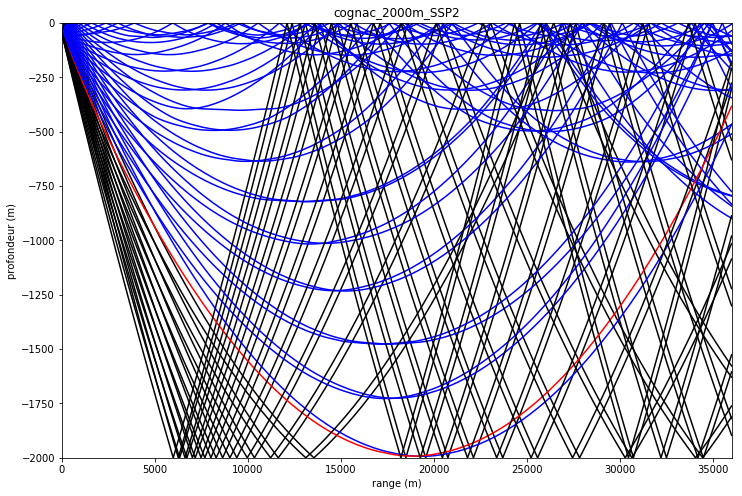

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

def plotray(filename=None):    
    #*******************************************************************************
    # Based on plotray.m by Michael Porter
    #*******************************************************************************

    Nsxyz       = np.zeros(3) 
    NBeamAngles = np.zeros(2)
    
    fid = open(filename,'r')
    title = fid.readline()
    freq  = float( fid.readline() )
    theline = str( fid.readline() )
    datai = theline.split()
    Nsxyz[0] = int( datai[0] )
    Nsxyz[1] = int( datai[1] )
    Nsxyz[2] = int( datai[2] )
    theline = str( fid.readline() )
    datai = theline.split()
    NBeamAngles[0] = int( datai[0] )
    NBeamAngles[1] = int( datai[1] )
    DEPTHT = float( fid.readline() )
    DEPTHB = float( fid.readline() )
    Type   = fid.readline()
    Nsx = int( Nsxyz[0] )
    Nsy = int( Nsxyz[1] )
    Nsz = int( Nsxyz[2] )
    Nalpha = int( NBeamAngles[0] )
    Nbeta  = int( NBeamAngles[1] )
    # axis limits
    rmin =  1.0e9
    rmax = -1.0e9
    zmin =  1.0e9
    zmax = -1.0e9
    
    plt.figure(figsize=(12,8))
    
    for isz in range(Nsz):
        for ibeam in range(Nalpha):
            #alpha0    = float( fid.readline() )
            theline = str( fid.readline() )
            l = len( theline )
            if l > 0:
               alpha0 = float( theline )
               theline = str( fid.readline() )
               datai = theline.split()
               nsteps    = int( datai[0] )
               NumTopBnc = int( datai[1] )
               NumBotBnc = int( datai[2] )
               r = np.zeros(nsteps)
               z = np.zeros(nsteps)
               for j in range(nsteps):
                   theline = str(fid.readline())
                   rz = theline.split()
                   r[j] = float( rz[0] )
                   z[j] = float( rz[1] )        
               rmin = min( [ min(r), rmin ] )
               rmax = max( [ max(r), rmax ] )
               zmin = min( [ min(z), zmin ] )
               zmax = max( [ max(z), zmax ] )
               
               ## Color of the ray
               #RED : no reflexion on top and bottom
               if np.logical_and (NumTopBnc==0, NumBotBnc==0):
                    color = 'r'
               #BLUE : no reflexion on bottom
               elif NumBotBnc==0 :
                    color = 'b'
               #BLACK : reflexion on top and bottom
               else : 
                    color = 'k'
                    
               ## plot  
               plt.plot( r, -z,  color = color )
               plt.axis([rmin,rmax,-zmax,-zmin])
    
    
    plt.title(filename[:-4])
    plt.xlabel('range (m)')
    plt.ylabel('profondeur (m)')
    
    plt.savefig('plotray_'+filename[:-4], dpi=100)
    
    fid.close()
    
    
plotray("cognac_2000m_SSP2.ray")